## Unknown Coin Flip Distribution Problem

<br>
**Problem:** We are given a coin and told that it will flip according to some random distribution of heads and tails. For example, the coin could flip 100% heads and 0 % tails, or 80% heads and 20% tails. This property, the percentage the coin flips heads/tails, will be referred to as the coin's "flip distribution". When we are first given the coin there is an equal probability of the coin having any one flip distribution.

If we flip the coin once an it lands heads, what is the new probability distribution for the possible flip distributions? What is the probability distribution after the coin lans heads $k$ times?

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Discrete Case

To gain some intuition on the problem, let's assume the coin can only have 3 flip distributions:
- 100% heads and 0% tails
- 50% heads and 50% tails
- 0% heads and 100% tails

Initially, we do not know what type of coin we have, thus there is an equal probability of having any of these three flip distributions. Graphically:

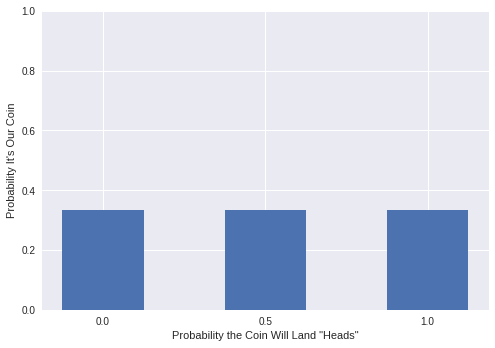

In [2]:
plt.bar([0, .5, 1], [1/3, 1/3, 1/3], width=.25)
plt.xticks([0, .5, 1])
plt.ylim([0, 1])
plt.xlabel('Probability the Coin Will Land "Heads"')
plt.ylabel("Probability It's Our Coin");

To make it easier to describe this problem, we will use the variable $h$ to refer to the probability of a coin landing "heads". The coin expected to land with flip distribution $h$ will be referred to as $C_h$, and the probability that we have $C_h$ after $k$ flips that landed heads will be expressed as $P(C_h,\ k)$. Thus for the distribution above, we have:

\begin{equation}
P(C_0,\ 0) = \frac{1}{3}
\end{equation}

\begin{equation}
P(C_{0.5},\ 0) = \frac{1}{3}
\end{equation}

\begin{equation}
P(C_1,\ 0) = \frac{1}{3}
\end{equation}

To find the probability distribution after flipping the coin and it landing heads, we apply Bayes' theorem:

\begin{equation}
P(A\ |\ B) = \frac{P(B\ |\ A)P(A)}{P(B)}
\end{equation}

Using the notation described above, this becomes the following:

\begin{equation}
P(C_h,\ k+1) = \frac{h\ P(C_h,\ k)}{\sum\limits_{h'} h'\ P(C_{h'},\ k)}
\end{equation}

Using this equation, let's plot the probability distributions for a range of $k$ values, starting with the initial state described above. Click the code and press Shift-Enter to run the animation:

<IPython.core.display.Javascript object>


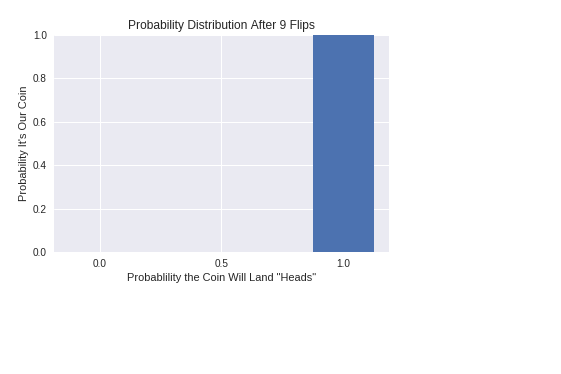

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt, numpy as np, time

prob_dist = np.array([1/3, 1/3, 1/3]) # Initial distribution
prob_heads = np.array([0, 0.5, 1]) # Possible flip distributions

for k in range(10):
    # Plot the distribution
    plt.cla()
    plt.bar(prob_heads, prob_dist, width=0.25)
    plt.xticks([0, .5, 1])
    plt.ylim([0, 1])
    plt.title('Probability Distribution After ' + str(k) + ' Flips')
    plt.xlabel('Probablility the Coin Will Land "Heads"')
    plt.ylabel("Probability It's Our Coin")
    plt.gcf().canvas.draw()
    
    # Compute the k+1 distribution
    prob_dist = prob_heads * prob_dist
    prob_dist /= sum(prob_dist) # Normalize
    time.sleep(0.5)

%matplotlib inline

## Continuous Case
Now that we understand how this works in the discrete case, we can consider the continuous case, where our coin could have any probability of landing "heads." In the continous case, our equation above becomes the following:

\begin{equation}
P_{k+1}(h) = \frac{h\ P_k(h)}{\int\limits_0^1 h'\ P_k(h')\ dh'}
\end{equation}

where $h$ still represents the probability of landing heads, and $P_k$ is a continuous probability density representing the probability of our coin having flip distribution $h$ after $k$ flips. Since we start with no knowledge of our coin's flip distribution, $P_0(h)$ is a constant probability desnity on the domain $h \in (0, 1)$. It is calculated as follows:

\begin{equation}
P_0(h) = \frac{1}{\int\limits_0^1ds} = 1
\end{equation}

We can use this to calculate $P_1(h)$:

\begin{equation}
P_1(h) = \frac{h\ P_0(h)}{\int\limits_0^1 h'\ P_0(h')\ dh'} = \frac{h}{\int\limits_0^1 h'\ dh'} = 2h
\end{equation}

And $P_2(h)$:

\begin{equation}
P_2(h) = \frac{h\ P_1(h)}{\int\limits_0^1 h'\ P_1(h')\ dh'} = \frac{2h^2}{2\int\limits_0^1 h'^2\ dh'} = 3h^2
\end{equation}

It is easy to show that this pattern continues, leading to the following relationship for $P_k(h)$:

\begin{equation}
P_k(h) = (k+1)h^{k}
\end{equation}

Thus we can plot the continuous distribution for increasing $k$. Again use Shift-Enter to run the animation:

<IPython.core.display.Javascript object>


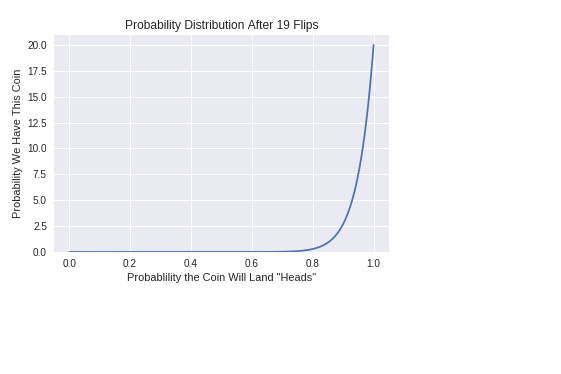

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt, numpy as np, time
h = np.linspace(0, 1, 1000)

for k in range(20):
    plt.cla()
    plt.plot(h, (k + 1)*h**k)
    plt.ylim(0, k+2)
    plt.title('Probability Distribution After ' + str(k) + ' Flips')
    plt.xlabel('Probablility the Coin Will Land "Heads"')
    plt.ylabel('Probability We Have This Coin')
    plt.gcf().canvas.draw()
    time.sleep(0.25)

%matplotlib inline